In [3]:
# Install and import the necessary libraries
!pip install -q -U scikit-dimension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.1 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import skdim

### Data

In [15]:
# generating data : np.array (n_points x n_dim) by embedding Lower-Dimensional Data in Higher Dimensions

# hyperBall - Here a uniformly sampled 5-ball embedded in 10 dimensions
# dataset = "hyperball"
# data = np.zeros((500,10))
# data[:,:5] = skdim.datasets.hyperBall(n = 500, d = 5, radius = 1, random_state = 0)

# # SwissRoll
dataset = "SwissRoll"
data = np.zeros((500,10))
data[:,:4] = skdim.datasets.swissRoll3Sph(n_swiss = 500, n_sphere=0, random_state=0)

# HyperSphere
# dataset = "HyperSphere"
# data = np.zeros((500,10))
# data[:,:6] = skdim.datasets.hyperSphere(n = 500, d=5, random_state=0)

# hyperTwinPeaks
# dataset = "hyperTwinPeaks"
# data = np.zeros((500,10))
# data[:,:6] = skdim.datasets.hyperTwinPeaks(n = 500, d=5, random_state=0)

### Method

In [19]:
# method = "TwoNN"
# ide = skdim.id.TwoNN()

# method = "KNN"
# ide = skdim.id.KNN()

# method = "Maximum Likelihood"
# ide = skdim.id.MLE()

# method = "Expected Simplex Skewness"
# ide = skdim.id.ESS()

# method = "Fisher Separability"
# ide = skdim.id.FisherS()

# method = "Correlation Dimension"
# ide = skdim.id.CorrInt()

# method = "Tight Local ID"
# ide = skdim.id.TLE()

method = "PCA"
ide = skdim.id.lPCA(ver="Fan")

# method = "DANCo"
# ide = skdim.id.DANCo(k=8)

### Noise

In [10]:
# Defining the range and steps of noise
noise_levels = np.arange(0, 1.05, 0.05)

### Intrinsic Dimension for each noise level

In [11]:
# Initializing lists to store intrinsic dimensions
intrinsic_dims = []

# Generating noisy data for each noise level and computing intrinsic dimension
for noise_level in noise_levels:
    noise = np.random.normal(0, noise_level, data.shape)
    data_noisy = data + noise
    id_value = ide.fit_transform(data_noisy)
    intrinsic_dims.append(id_value)

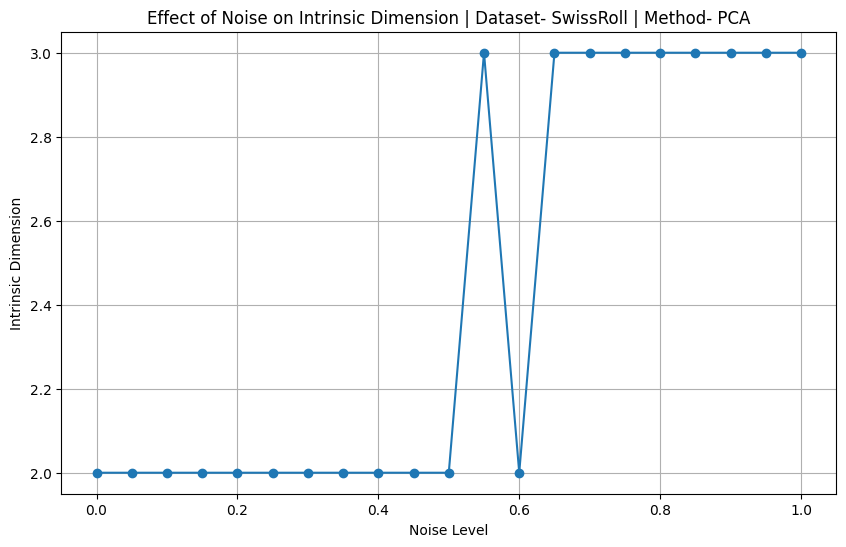

In [12]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, intrinsic_dims, marker='o')
plt.title(f'Effect of Noise on Intrinsic Dimension | Dataset- {dataset} | Method- {method}')
plt.xlabel('Noise Level')
plt.ylabel('Intrinsic Dimension')
plt.grid(True)
plt.show()

## Combining Plots

In [190]:
datasets = {
    "hyperBall": np.zeros((500, 10)),
    "SwissRoll": np.zeros((500, 10)),
    "HyperSphere": np.zeros((500, 10)),
    "hyperTwinPeaks": np.zeros((500, 10))
}

# Generating the data for each dataset
datasets["hyperBall"][:, :5] = skdim.datasets.hyperBall(n=500, d=5, radius=1, random_state=0)
datasets["SwissRoll"][:, :4] = skdim.datasets.swissRoll3Sph(n_swiss=250, n_sphere=250, random_state=0)
datasets["HyperSphere"][:, :6] = skdim.datasets.hyperSphere(n=500, d=5, random_state=0)
datasets["hyperTwinPeaks"][:, :6] = skdim.datasets.hyperTwinPeaks(n=500, d=5, random_state=0)

In [191]:
methods = {
    "TwoNN": skdim.id.TwoNN(),
    # "KNN": skdim.id.KNN(),
    "Maximum Likelihood": skdim.id.MLE(),
    "Fisher Separability": skdim.id.FisherS(),
    "Correlation Dimension": skdim.id.CorrInt(),
    "Tight Local ID": skdim.id.TLE(),
    "PCA": skdim.id.lPCA(ver="Fan"),
    "DANCo": skdim.id.DANCo(k=8),
}

In [192]:
# Defining the range and steps of noise
noise_levels = np.arange(0, 1.05, 0.05)

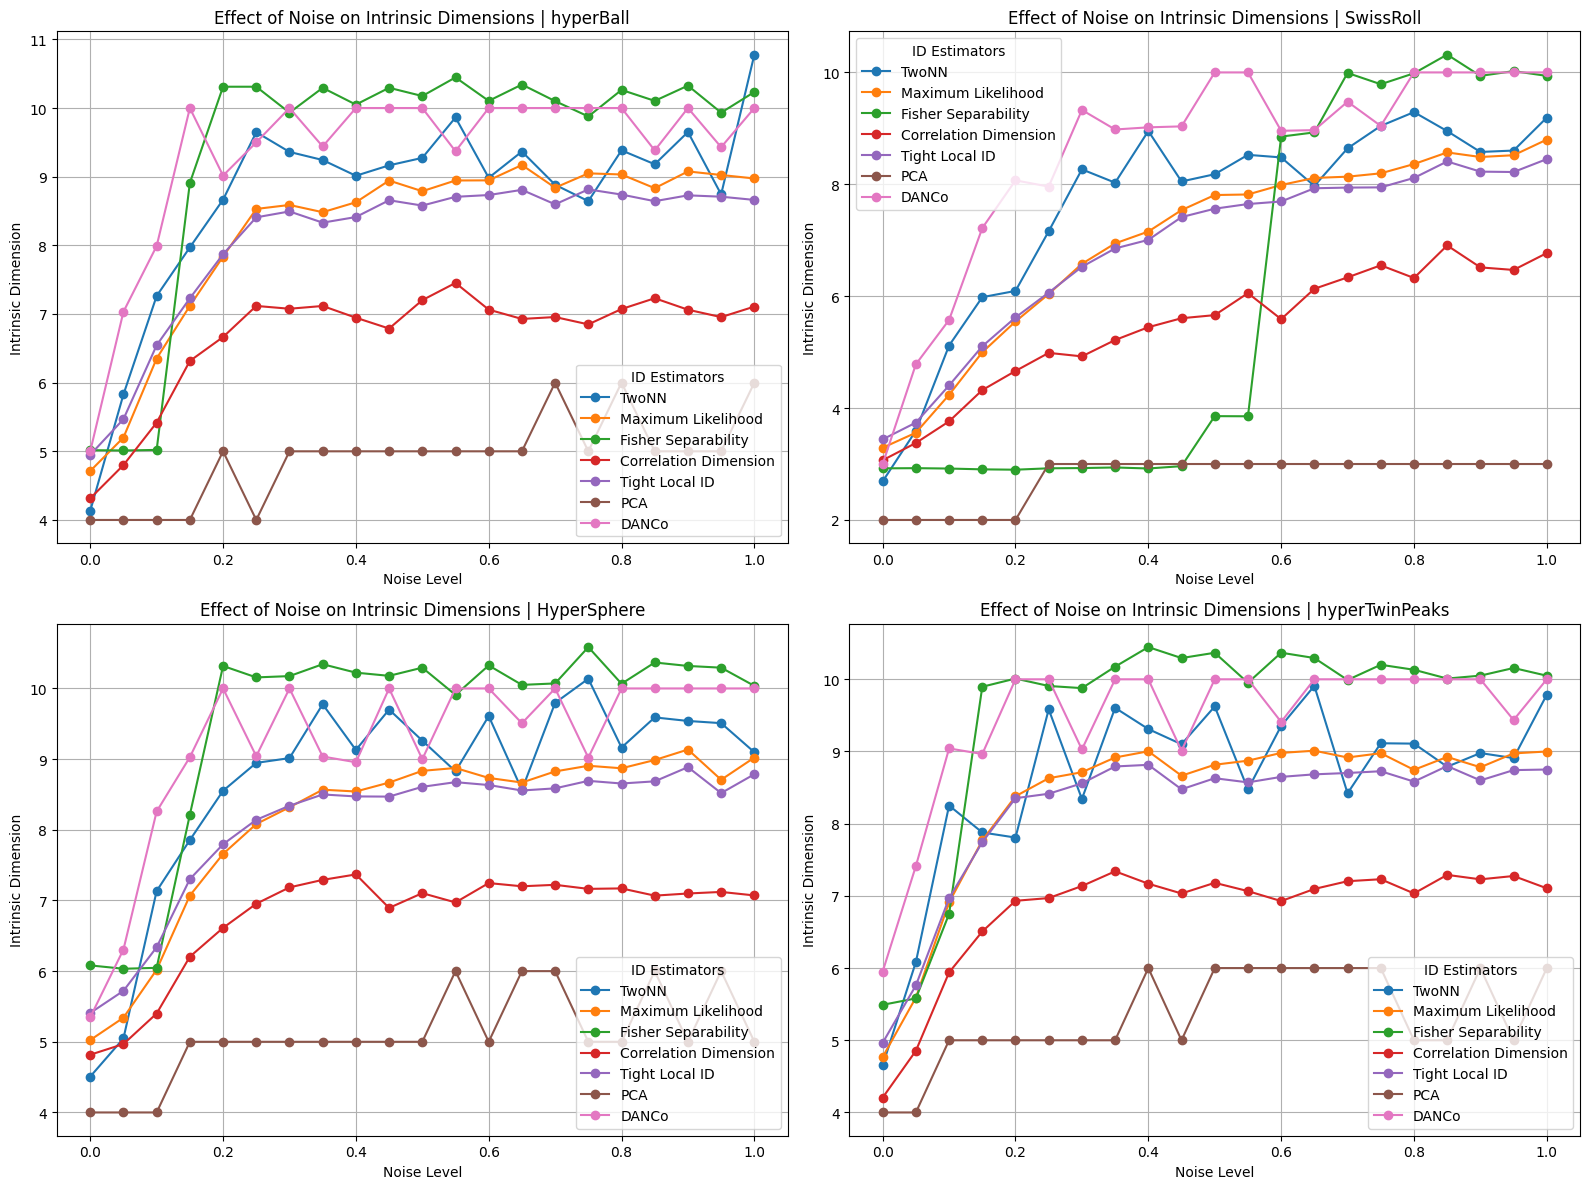

In [193]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid for 4 datasets
axes = axes.flatten()

# Looping over datasets and computing intrinsic dimensions for each
for ax, (dataset_name, data) in zip(axes, datasets.items()):

    intrinsic_dims = {method: [] for method in methods}

    # Generating noisy data and computing intrinsic dimensions
    for noise_level in noise_levels:
        noise = np.random.normal(0, noise_level, data.shape)
        data_noisy = data + noise

        for name, ide in methods.items():
            id_value = ide.fit_transform(data_noisy)
            intrinsic_dims[name].append(id_value)

    # Ploting results for the current dataset
    for name, id_values in intrinsic_dims.items():
        ax.plot(noise_levels, id_values, label=name, marker='o')

    ax.set_xlabel('Noise Level')
    ax.set_ylabel('Intrinsic Dimension')
    ax.set_title(f'Effect of Noise on Intrinsic Dimensions | {dataset_name}')
    ax.legend(title="ID Estimators")
    ax.grid(True)

plt.tight_layout()
plt.show()

### PCA Estimator Experiments

In [20]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples = 500, noise=0.05, random_state=0)

In [40]:
method = "PCA"
versions = ["FO","Fan","maxgap","ratio","participation_ratio","Kaiser","broken_stick"]

In [41]:
# Initializing lists to store intrinsic dimensions
intrinsic_dims = {version:[] for version in versions}

for version in versions:
  ide = skdim.id.lPCA(ver=version)

  # Generating noisy data for each noise level and computing intrinsic dimension
  for noise_level in noise_levels:
      noise = np.random.normal(0, noise_level, X.shape)
      data_noisy = X + noise
      id_value = ide.fit_transform(data_noisy)
      intrinsic_dims[version].append(id_value)

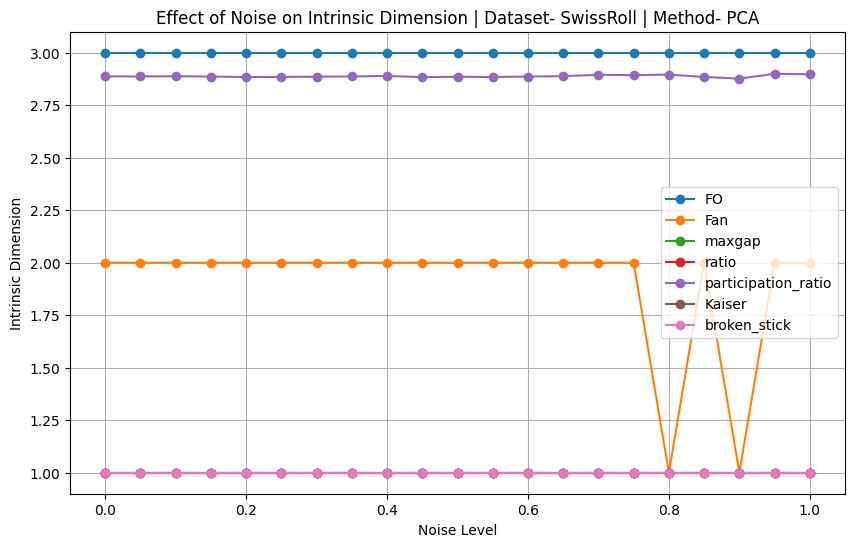

In [42]:
# Plot the results
plt.figure(figsize=(10, 6))
for name, id_values in intrinsic_dims.items():
    plt.plot(noise_levels, id_values, label=name, marker='o')
plt.title(f'Effect of Noise on Intrinsic Dimension | Dataset- {dataset} | Method- {method}')
plt.xlabel('Noise Level')
plt.ylabel('Intrinsic Dimension')
plt.legend()
plt.grid(True)
plt.show()